In [48]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('Vic_Road_Crash_Data.csv')
df.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,NODE_ID,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
0,T20120000060,1/1/2012,19:40:00,6,Vehicle overturned (no collision),1,Sunday,184.0,OUT OF CONTROL ON CARRIAGEWAY (ON BEND),1.0,248602.0,T intersection,2.0,60.0,Local Road
1,T20120000028,1/1/2012,04:00:00,4,Collision with a fixed object,1,Sunday,183.0,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,5.0,248598.0,T intersection,2.0,100.0,Local Road
2,T20120000021,1/1/2012,07:30:00,4,Collision with a fixed object,1,Sunday,171.0,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,1.0,248597.0,Not at intersection,3.0,50.0,Local Road
3,T20120000056,1/1/2012,16:15:00,4,Collision with a fixed object,1,Sunday,183.0,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE,1.0,249133.0,T intersection,2.0,100.0,Local Road
4,T20120000018,1/1/2012,05:15:00,4,Collision with a fixed object,1,Sunday,173.0,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,5.0,22636.0,Cross intersection,3.0,100.0,Arterial Highway


In [3]:
df.describe()

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,SEVERITY,SPEED_ZONE
count,20459.000000,20459.000000,20458.000000,20458.000000,20458.000000,20458.000000,20458.000000
mean,2.221809,4.092673,138.586519,1.797879,161435.076400,2.620735,67.276127
std,1.990119,1.943003,26.218922,1.435403,110943.367668,0.520879,17.601287
min,1.000000,0.000000,100.000000,1.000000,4.000000,1.000000,30.000000
25%,1.000000,2.000000,120.000000,1.000000,42784.000000,2.000000,60.000000
50%,1.000000,4.000000,130.000000,1.000000,249624.500000,3.000000,60.000000
75%,4.000000,6.000000,170.000000,3.000000,257194.750000,3.000000,80.000000
max,9.000000,7.000000,199.000000,9.000000,796453.000000,3.000000,100.000000


In [4]:
df.isnull().sum()

ACCIDENT_NO           0
ACCIDENT_DATE         0
ACCIDENT_TIME         0
ACCIDENT_TYPE         0
ACCIDENT_TYPE_DESC    0
DAY_OF_WEEK           0
DAY_WEEK_DESC         0
DCA_CODE              1
DCA_DESC              1
LIGHT_CONDITION       1
NODE_ID               1
ROAD_GEOMETRY_DESC    1
SEVERITY              1
SPEED_ZONE            1
RMA                   1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20459 entries, 0 to 20458
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACCIDENT_NO         20459 non-null  object 
 1   ACCIDENT_DATE       20459 non-null  object 
 2   ACCIDENT_TIME       20459 non-null  object 
 3   ACCIDENT_TYPE       20459 non-null  int64  
 4   ACCIDENT_TYPE_DESC  20459 non-null  object 
 5   DAY_OF_WEEK         20459 non-null  int64  
 6   DAY_WEEK_DESC       20459 non-null  object 
 7   DCA_CODE            20458 non-null  float64
 8   DCA_DESC            20458 non-null  object 
 9   LIGHT_CONDITION     20458 non-null  float64
 10  NODE_ID             20458 non-null  float64
 11  ROAD_GEOMETRY_DESC  20458 non-null  object 
 12  SEVERITY            20458 non-null  float64
 13  SPEED_ZONE          20458 non-null  float64
 14  RMA                 20458 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 2.3+

In [6]:
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

ACCIDENT_NO           0
ACCIDENT_DATE         0
ACCIDENT_TIME         0
ACCIDENT_TYPE         0
ACCIDENT_TYPE_DESC    0
DAY_OF_WEEK           0
DAY_WEEK_DESC         0
DCA_CODE              0
DCA_DESC              0
LIGHT_CONDITION       0
NODE_ID               0
ROAD_GEOMETRY_DESC    0
SEVERITY              0
SPEED_ZONE            0
RMA                   0
dtype: int64

In [7]:
grouped = df['LIGHT_CONDITION'].value_counts().reset_index()
grouped.rename(columns = {'count': 'Number Of Accidents'}, inplace = True)
px.bar(grouped, x = 'LIGHT_CONDITION', y = 'Number Of Accidents', color = 'LIGHT_CONDITION', title = 'Number Of Accidents By Light Condition')

In [8]:
grouped = df['DCA_DESC'].value_counts().reset_index().head()
px.bar(grouped, x = 'DCA_DESC', y = 'count', color = 'DCA_DESC')

In [9]:
grouped = df['DAY_WEEK_DESC'].value_counts().reset_index()
px.bar(grouped, 'DAY_WEEK_DESC', 'count', color = 'DAY_WEEK_DESC')

In [10]:
grouped = df['ROAD_GEOMETRY_DESC'].value_counts().reset_index()
px.bar(grouped, x = 'ROAD_GEOMETRY_DESC', y = 'count', color = 'ROAD_GEOMETRY_DESC')

In [11]:
grouped = df['SPEED_ZONE'].value_counts().reset_index()
px.bar(grouped, x = 'SPEED_ZONE', y = 'count', color = 'SPEED_ZONE')

In [12]:
grouped = df[['SPEED_ZONE', 'SEVERITY']].value_counts().reset_index()
px.bar(grouped, x = 'SPEED_ZONE', y = 'count', color = 'SEVERITY')

In [13]:
grouped = df[['RMA', 'SEVERITY']].value_counts().reset_index()
px.bar(grouped, x = 'RMA', y = 'count', color = 'SEVERITY')

<Axes: >

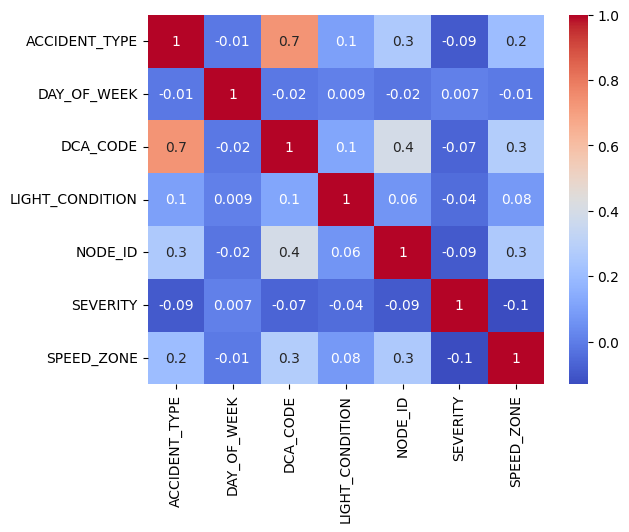

In [14]:
corr = df.select_dtypes(np.number).corr()
sns.heatmap(corr, annot = True, fmt = '0.1g', cmap = 'coolwarm')

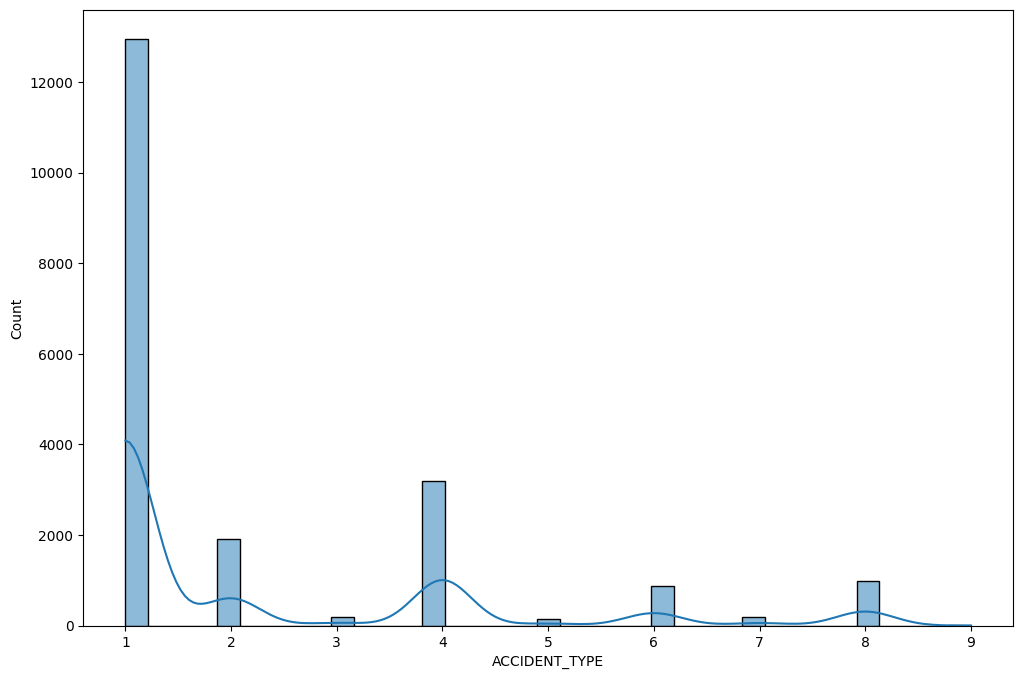

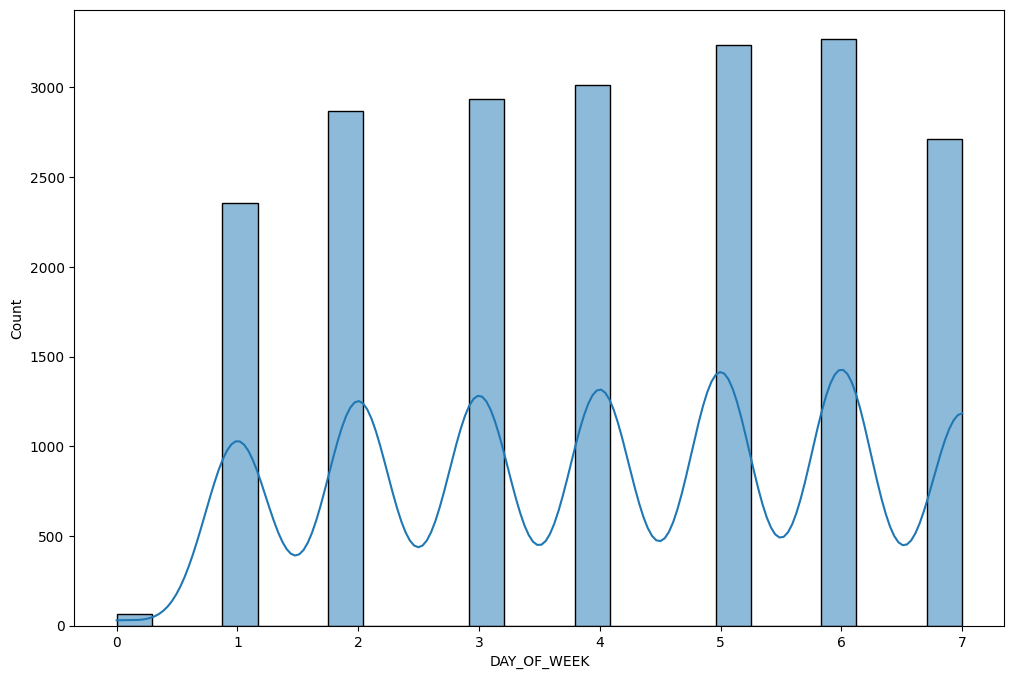

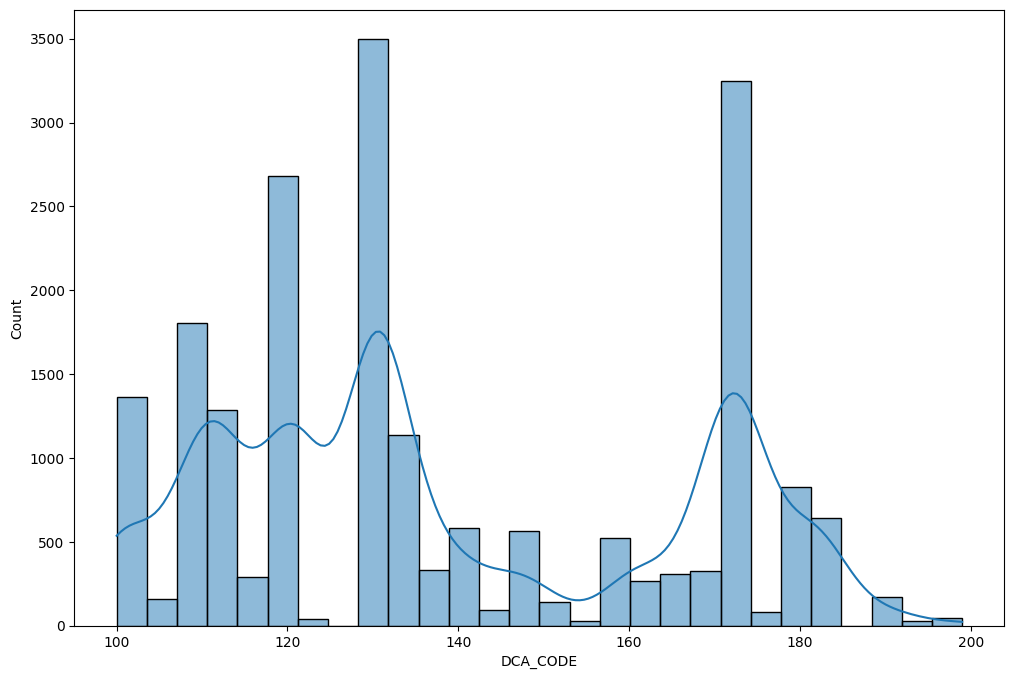

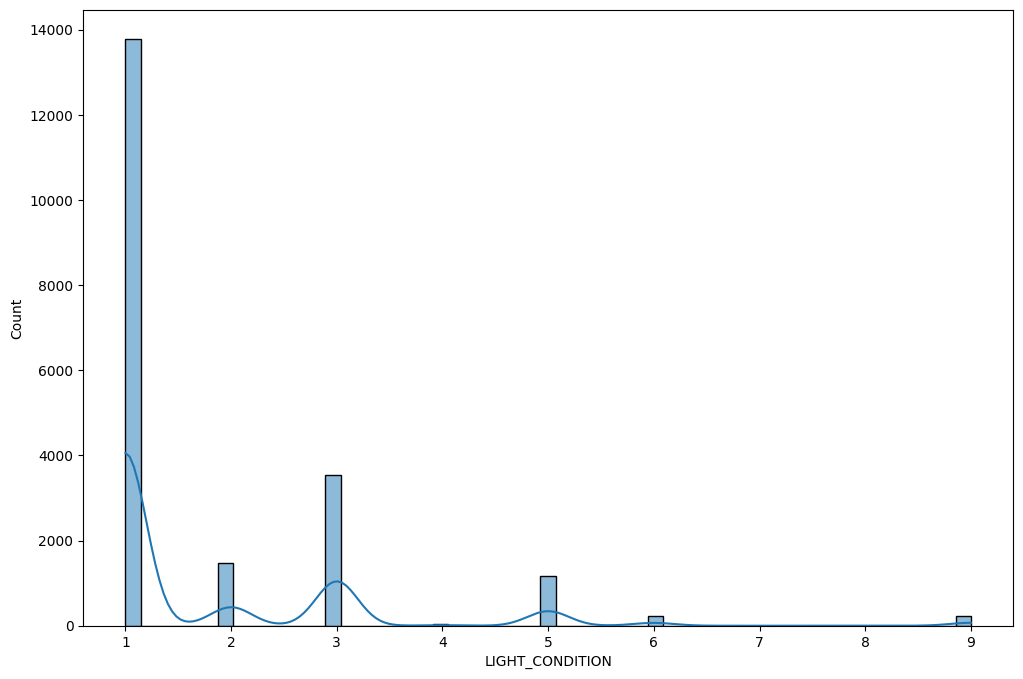

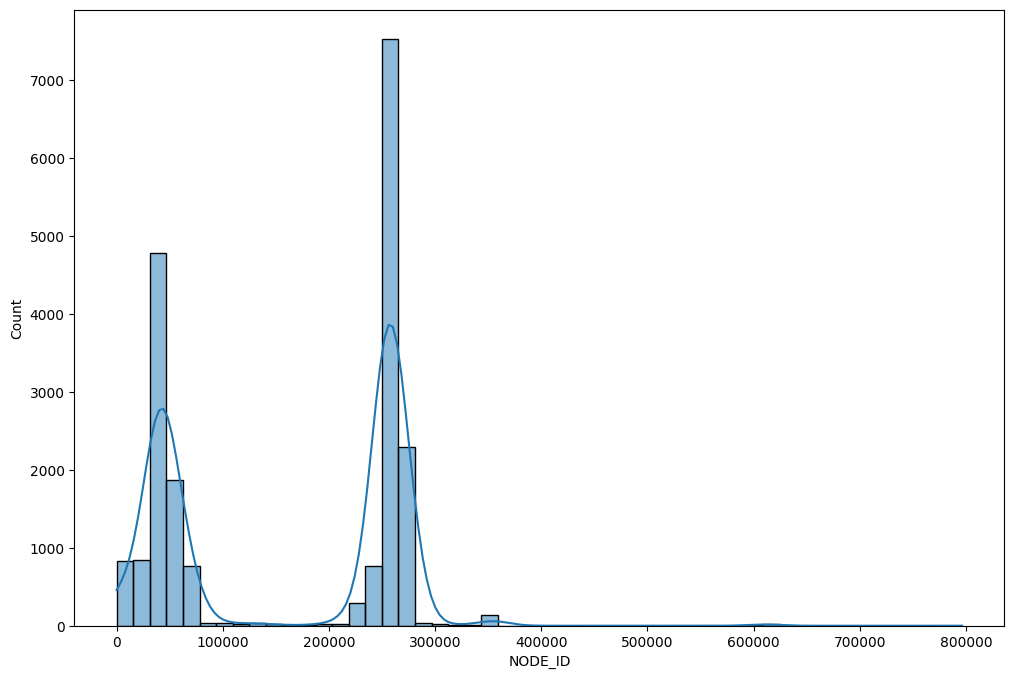

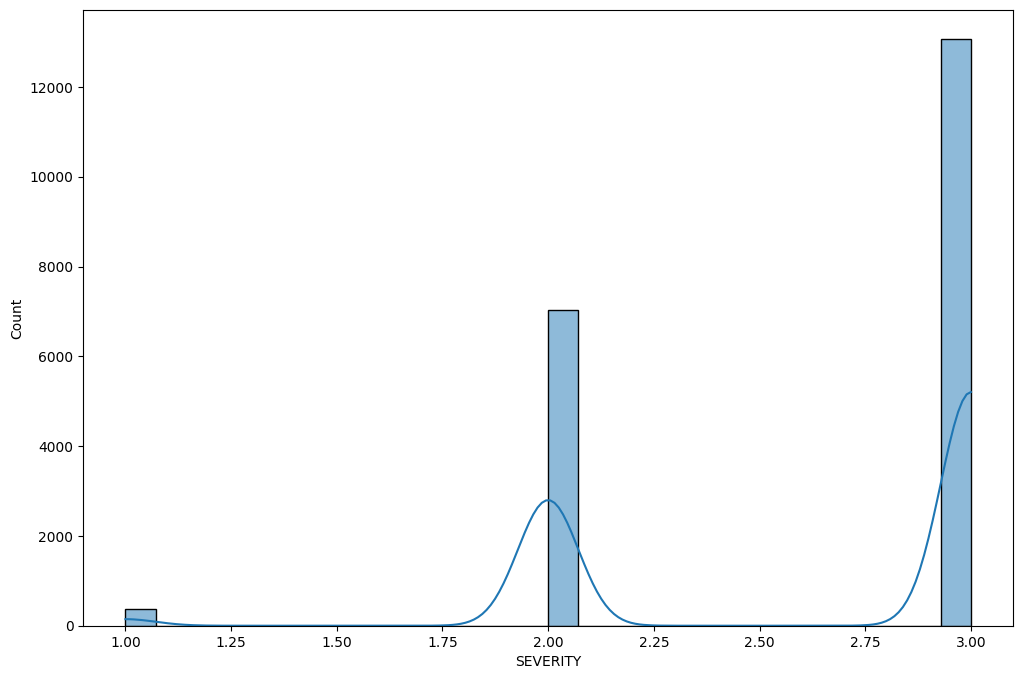

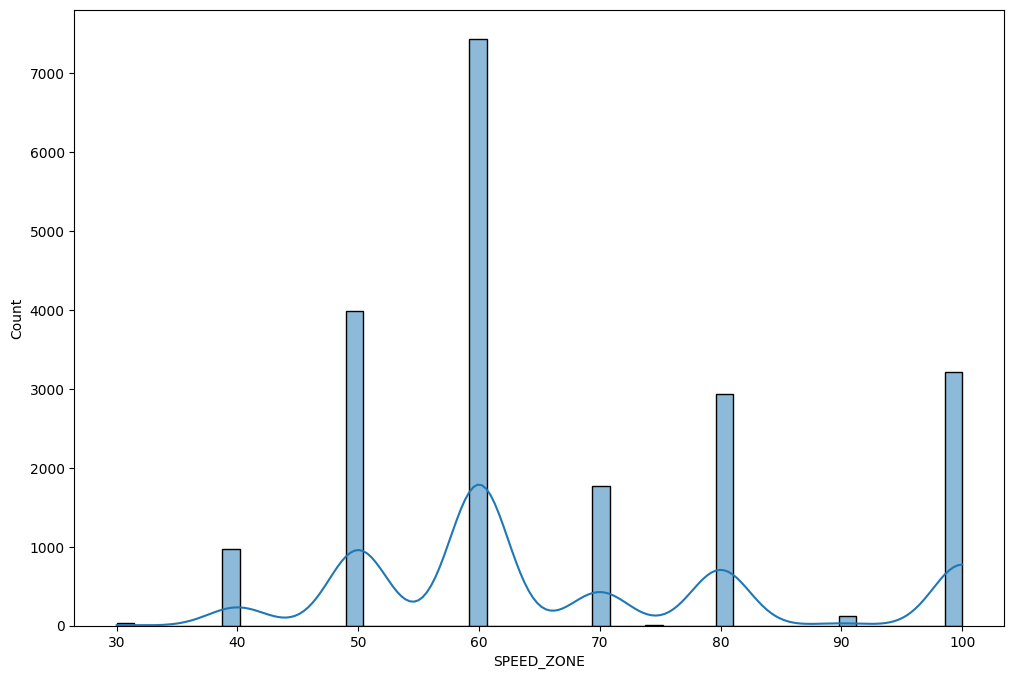

In [15]:
numerical_features = df.select_dtypes(np.number).columns.tolist()
for col in numerical_features:
  plt.figure(figsize = (12,8))
  sns.histplot(df[col], kde = True)
  plt.show()

In [16]:
df[df['DAY_OF_WEEK'] == 6]

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,ACCIDENT_TYPE_DESC,DAY_OF_WEEK,DAY_WEEK_DESC,DCA_CODE,DCA_DESC,LIGHT_CONDITION,NODE_ID,ROAD_GEOMETRY_DESC,SEVERITY,SPEED_ZONE,RMA
124,T20120000367,6/1/2012,12:45:00,1,Collision with vehicle,6,Friday,121.0,RIGHT THROUGH,1.0,35876.0,Multiple intersection,3.0,60.0,Freeway
125,T20120000425,6/1/2012,09:30:00,1,Collision with vehicle,6,Friday,130.0,REAR END(VEHICLES IN SAME LANE),1.0,248874.0,Not at intersection,3.0,70.0,Local Road
126,T20120000424,6/1/2012,17:40:00,1,Collision with vehicle,6,Friday,132.0,RIGHT REAR.,1.0,46494.0,T intersection,3.0,60.0,Local Road
127,T20120001190,6/1/2012,17:40:00,1,Collision with vehicle,6,Friday,110.0,CROSS TRAFFIC(INTERSECTIONS ONLY),1.0,30407.0,Cross intersection,3.0,80.0,Arterial Other
128,T20120000342,6/1/2012,05:55:00,1,Collision with vehicle,6,Friday,130.0,REAR END(VEHICLES IN SAME LANE),2.0,273227.0,Not at intersection,2.0,100.0,Arterial Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20339,T20130015485,26/7/2013,16:40:00,1,Collision with vehicle,6,Friday,192.0,STRUCK TRAIN,1.0,262434.0,Not at intersection,2.0,40.0,Local Road
20340,T20130015483,26/7/2013,16:30:00,1,Collision with vehicle,6,Friday,120.0,HEAD ON (NOT OVERTAKING),1.0,263214.0,Not at intersection,2.0,80.0,Local Road
20341,T20130015458,26/7/2013,13:30:00,1,Collision with vehicle,6,Friday,110.0,CROSS TRAFFIC(INTERSECTIONS ONLY),1.0,29468.0,Cross intersection,2.0,60.0,Arterial Highway
20342,T20130015482,26/7/2013,19:00:00,1,Collision with vehicle,6,Friday,113.0,RIGHT NEAR (INTERSECTIONS ONLY),3.0,277083.0,T intersection,3.0,80.0,Arterial Other


In [17]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 40]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [18]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 50]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [19]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 60]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map = color_discrete_map)

In [20]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 70]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [21]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 80]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [22]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 90]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [23]:
color_discrete_map = {
    'Highly Severe': 'red',
    'Moderately Severe': 'orange',
    'Not Severe': 'green'
}
grouped = df[df['SPEED_ZONE'] == 100]['SEVERITY'].value_counts().reset_index()
grouped['SEVERITY'] = grouped['SEVERITY'].apply(lambda x: 'Highly Severe' if x == 3 else ('Moderately Severe' if x == 2 else 'Not Severe'))
px.pie(grouped, values = 'count', names = 'SEVERITY', color = 'SEVERITY', color_discrete_map=color_discrete_map)

In [24]:
df['ACCIDENT_DATE'] = pd.to_datetime(df['ACCIDENT_DATE'], format = '%d/%m/%Y')

In [25]:
monthly_trends = df.resample('M', on = 'ACCIDENT_DATE').size().reset_index(name = 'count')
px.line(monthly_trends, x = 'ACCIDENT_DATE', y = 'count')

In [26]:
grouped = df['ACCIDENT_TIME'].value_counts().reset_index(name = 'count')
px.bar(grouped, x = 'ACCIDENT_TIME', y = 'count')

In [27]:
label_encoders = {}
for col in ['DAY_OF_WEEK', 'ACCIDENT_TYPE_DESC', 'LIGHT_CONDITION', 'ROAD_GEOMETRY_DESC', 'SPEED_ZONE', 'SEVERITY', 'RMA']:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))
  label_encoders[col] = le

In [28]:
features = ['DAY_OF_WEEK', 'ACCIDENT_TYPE_DESC', 'LIGHT_CONDITION', 'ROAD_GEOMETRY_DESC', 'SPEED_ZONE', 'RMA']
target = ['SEVERITY']

In [29]:
X = df[features]
y = df[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.reshape(len(y_train.values), ))

RandomForestClassifier()

In [32]:
accuracy_score(y_test, rf.predict(X_test))

0.6197458455522972

In [33]:
feature_importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Feature Importance': feature_importances}).sort_values(by = 'Feature Importance', ascending = False)
px.bar(feature_importances, x = 'Feature Importance', y = 'Feature', orientation = 'h')

<Axes: >

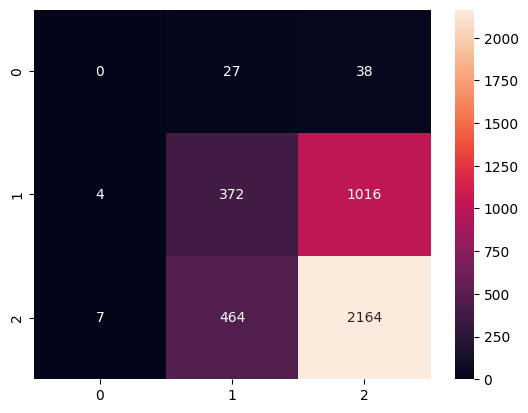

In [34]:
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot = True, fmt = '0.5g')

In [35]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.43      0.27      0.33      1392
           2       0.67      0.82      0.74      2635

    accuracy                           0.62      4092
   macro avg       0.37      0.36      0.36      4092
weighted avg       0.58      0.62      0.59      4092



In [49]:
smote = SMOTE(k_neighbors = 3, random_state = 42)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote

,DAY_OF_WEEK,ACCIDENT_TYPE_DESC,LIGHT_CONDITION,ROAD_GEOMETRY_DESC,SPEED_ZONE,RMA
0,1,7,0,4,4,3
1,1,0,4,4,0,3
2,1,0,0,3,3,3
3,1,0,0,4,0,3
4,1,0,4,0,0,0
...,...,...,...,...,...,...
39193,1,1,2,4,4,1
39194,4,1,2,4,7,0
39195,7,1,0,3,0,2
39196,6,0,0,3,0,3


In [50]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_trainscaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_trainscaled, y_train)
y_pred = logreg.predict(X_testscaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.54      0.49      2619
           1       0.37      0.28      0.32      2558
           2       0.42      0.45      0.43      2663

    accuracy                           0.42      7840
   macro avg       0.42      0.42      0.41      7840
weighted avg       0.42      0.42      0.42      7840



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [59]:
coef_df = pd.DataFrame({'features': features, 'Coeficients': logreg.coef_[0]})
coef_df['Coeficients'] = abs(coef_df['Coeficients'])
coef_df.sort_values(by = 'Coeficients', inplace = True, ascending = False)
px.bar(coef_df, x = 'Coeficients', y = 'features', orientation = 'h')

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [62]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2619
           1       0.55      0.42      0.48      2558
           2       0.57      0.62      0.59      2663

    accuracy                           0.63      7840
   macro avg       0.62      0.63      0.62      7840
weighted avg       0.62      0.63      0.62      7840



In [67]:
#Trying to find best xgb paramaters
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

def parameter_tuning(X, y, param_grid, cv = 5, n_iter = 50, random_state = 42):
  np.random.seed(random_state)
  best_score = -np.inf
  best_params = None

  for _ in tqdm(range(n_iter), desc = 'Hyperparameter Tuning Progress'):
    params = {key: np.random.choice(values) for key, values in param_grid.items()}

    model = XGBClassifier(**params, use_label_encoder = False, eval_metric = 'mlogloss')
    scores = cross_val_score(model, X, y, cv = cv, scoring = 'accuracy')
    mean_score = np.mean(scores)

    if mean_score > best_score:
      best_score = mean_score
      best_params = params

  return best_params, best_score

param_grid = {
    'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
}
best_params, best_score = parameter_tuning(X_train, y_train, param_grid, cv=5, n_iter=50, random_state=42)
print(best_params)

Hyperparameter Tuning Progress: 100%|██████████| 50/50 [03:23<00:00,  4.08s/it]

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 1.0, 'gamma': 0.1}


In [70]:
classifier = XGBClassifier(best_params)
classifier.fit(X_train, y_train)

print(classification_report(y_test, classifier.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning:

Pass `objective` as keyword args.



              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2619
           1       0.55      0.42      0.48      2558
           2       0.57      0.62      0.59      2663

    accuracy                           0.63      7840
   macro avg       0.62      0.63      0.62      7840
weighted avg       0.62      0.63      0.62      7840



In [73]:
y_train_encoded = to_categorical(y_train, num_classes = 3)
y_test_encoded = to_categorical(y_test, num_classes = 3)

In [78]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = X_trainscaled.shape[1]))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                     

In [79]:
history = model.fit(X_trainscaled, y_train_encoded, epochs = 100, batch_size = 256, validation_split = 0.2, verbose = 1)

Epoch 1/100
98/98 [==============================] - 8s 13ms/step - loss: 1.3370 - accuracy: 0.3617 - val_loss: 1.0575 - val_accuracy: 0.4522
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 1.1563 - accuracy: 0.3869 - val_loss: 1.0420 - val_accuracy: 0.4554
Epoch 3/100
98/98 [==============================] - 1s 8ms/step - loss: 1.0941 - accuracy: 0.4026 - val_loss: 1.0304 - val_accuracy: 0.4581
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 1.0579 - accuracy: 0.4266 - val_loss: 1.0200 - val_accuracy: 0.4577
Epoch 5/100
98/98 [==============================] - 0s 5ms/step - loss: 1.0430 - accuracy: 0.4364 - val_loss: 1.0102 - val_accuracy: 0.4829
Epoch 6/100
98/98 [==============================] - 1s 5ms/step - loss: 1.0300 - accuracy: 0.4562 - val_loss: 0.9962 - val_accuracy: 0.4989
Epoch 7/100
98/98 [==============================] - 0s 5ms/step - loss: 1.0176 - accuracy: 0.4658 - val_loss: 0.9816 - val_accuracy: 0.5048
Epoch 8/100
